In [6]:
import pandas as pd

import matplotlib.pyplot as plt
df = pd.read_csv('HOUSING.csv')

df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.describe(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(          longitude      latitude  housing_median_age   total_rooms  \
 count  20640.000000  20640.000000        20640.000000  20640.000000   
 mean    -119.569704     35.631861           28.639486   2635.763081   
 std        2.003532      2.135952           12.585558   2181.615252   
 min     -124.350000     32.540000            1.000000      2.000000   
 25%     -121.800000     33.930000           18.000000   1447.750000   
 50%     -118.490000     34.260000           29.000000   2127.000000   
 75%     -118.010000     37.710000           37.000000   3148.000000   
 max     -114.310000     41.950000           52.000000  39320.000000   
 
        total_bedrooms    population    households  median_income  \
 count    20433.000000  20640.000000  20640.000000   20640.000000   
 mean       537.870553   1425.476744    499.539680       3.870671   
 std        421.385070   1132.462122    382.329753       1.899822   
 min          1.000000      3.000000      1.000000       0.499900   
 25% 

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
df=df.fillna(method="ffill")

In [22]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
median = df['median_house_value'].median()

median

179700.0

In [24]:
df['above_median'] = (df['median_house_value'] - median) > 0

In [25]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,above_median
14329,-117.17,32.71,39.0,311.0,181.0,206.0,113.0,0.7685,187500.0,NEAR OCEAN,True
5757,-118.28,34.18,50.0,2195.0,336.0,878.0,309.0,6.8840,365600.0,<1H OCEAN,True
8299,-118.14,33.77,52.0,2208.0,409.0,791.0,408.0,5.8408,500000.0,NEAR OCEAN,True
1467,-121.99,37.96,16.0,3324.0,479.0,1470.0,461.0,7.6166,260400.0,INLAND,True
17586,-121.93,37.30,14.0,6277.0,1742.0,3025.0,1630.0,4.0653,234200.0,<1H OCEAN,True


In [43]:
df_features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','households','median_income']
x=df[df_features]
x.describe()
x.isna().sum()
y= df.above_median

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train.shape, x_test.shape

((18576, 7), (2064, 7))

In [50]:
y_train.shape, y_test.shape

((18576,), (2064,))

# Train a logistic regression model for price classification

In [51]:
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression(solver='liblinear').fit(x_train, y_train)
print("Training_score : " , mdl.score(x_train, y_train))

Training_score :  0.7825689061154177


In [52]:
y_pred = mdl.predict(x_test)
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.sample(10)

,predicted,actual
12096,True,False
13604,True,False
10584,True,True
4186,True,True
1894,False,False
14100,False,False
19355,True,True
3550,True,True
4435,False,False
13908,False,False


In [53]:
from sklearn.metrics import accuracy_score

print("Testing_score : ", accuracy_score(y_test, y_pred))

Testing_score :  0.7897286821705426


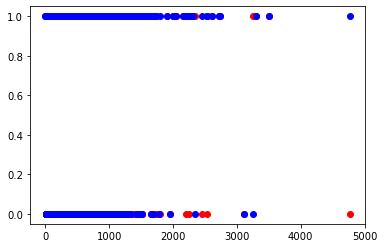

In [55]:
plt.scatter(x_test['households'], y_test, color = 'r')
plt.scatter(x_test['households'], y_pred, color = 'b')